In [1]:
import glob
import matplotlib as mlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
from numpy import loadtxt
import re
import csv
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.patches as mpatches

import sys
sys.path.insert(1, '/home/stasya/prj/alps-running/TdAlps-Internal/')
import TdAlps
from collections import OrderedDict

In [2]:
#Plotting settings
font = {
        'weight' : 'normal',
        'size'   : 16}

mlib.rc('font', **font)

In [3]:
sm={
    'GF': 1.166*10**(-5),
    'sw': np.sqrt(0.231),
    'hbar': 6.582*10**(-25),
    'c': 3*10**10,
    'alpha': 1/137,
    'Vtb': 0.999,
    'Vts': 0.0404,
    'Xt': 1.469,
    'BrBtoKnunu+': 4.5*10**(-6),
    'NBBBaBar': 471*10**6,
    'NBBBelleII': 5*10**10,
    'me': 0.000511,
    'mmu': 0.1056,
    'mtau': 1.777,
    'mu': 2.2/1000,
    'md': 4.7/1000,
    'ms': 95/1000,
    'mc': 1.275,
    'mb': 4.18,
    'mt': 173,
    'mZ': 91.19,
    'mB+': 5.279,
    'mK+': 0.494,
    'tauB+': 1.638*10**(-12)
}

In [4]:
def f(Lambda):
    return Lambda/(4 * np.pi)

## based on https://github.com/rrschaefer/alps (formulas taken from 2012.12272 and 1708.00443)

### Alps running implemented in https://github.com/TdAlps

In [5]:
def getLScoefficients(cff, cww, cbb, Lambda, mu):
    HC = OrderedDict()
    HC['Q'] = np.array([[cff,0,0],[0,cff,0],[0,0,cff]])
    HC['u'] = np.array([[-cff,0,0],[0,-cff,0],[0,0,-cff]])
    HC['d'] = np.array([[-cff,0,0],[0,-cff,0],[0,0,-cff]])
    HC['L'] = np.array([[cff,0,0],[0,cff,0],[0,0,cff]])
    HC['e'] = np.array([[-cff,0,0],[0,-cff,0],[0,0,-cff]])
    HC['GG'] = 0
    HC['WW'] = cww
    HC['BB'] = cbb
    return TdAlps.RunRotateMatchRun(HC, Lambda, mu, 3)


def getCuu(cff, cww, cbb, Lambda, mu):
    coeffs = getLScoefficients(cff, cww, cbb, Lambda, mu)
    return coeffs['U'][0][0]-coeffs['u'][0][0]

def getCcc(cff, cww, cbb, Lambda, mu):
    coeffs = getLScoefficients(cff, cww, cbb, Lambda, mu)
    return coeffs['U'][1][1]-coeffs['u'][1][1]

def getCtt(cff, cww, cbb, Lambda, mu):
    coeffs = getLScoefficients(cff, cww, cbb, Lambda, mu)
    return coeffs['U'][2][2]-coeffs['u'][2][2]

def getCdd(cff, cww, cbb, Lambda, mu):
    coeffs = getLScoefficients(cff, cww, cbb, Lambda, mu)
    return coeffs['D'][0][0]-coeffs['d'][0][0]

def getCss(cff, cww, cbb, Lambda, mu):
    coeffs = getLScoefficients(cff, cww, cbb, Lambda, mu)
    return coeffs['D'][1][1]-coeffs['d'][1][1]

def getCbb(cff, cww, cbb, Lambda, mu):
    coeffs = getLScoefficients(cff, cww, cbb, Lambda, mu)
    return coeffs['D'][2][2]-coeffs['d'][2][2]

def getCGG(cff, cww, cbb, Lambda, mu):
    coeffs = getLScoefficients(cff, cww, cbb, Lambda, mu)
    return coeffs['GG']

def getCgg(cff, cww, cbb, Lambda, mu):
    coeffs = getLScoefficients(cff, cww, cbb, Lambda, mu)
    return coeffs['gamgam']

def getCee(cff, cww, cbb, Lambda, mu):
    coeffs = getLScoefficients(cff, cww, cbb, Lambda, mu)
    return coeffs['E'][0][0]-coeffs['e'][0][0]

def getCmumu(cff, cww, cbb, Lambda, mu):
    coeffs = getLScoefficients(cff, cww, cbb, Lambda, mu)
    return coeffs['E'][1][1]-coeffs['e'][1][1]

def getCtautau(cff, cww, cbb, Lambda, mu):
    coeffs = getLScoefficients(cff, cww, cbb, Lambda, mu)
    return coeffs['E'][2][2]-coeffs['e'][2][2]

def getCbs(cff, cww, cbb, Lambda, mu):
    coeffs = getLScoefficients(cff, cww, cbb, Lambda, mu)
    return coeffs['D'][2][1]-coeffs['d'][2][1]

def getAlphaEM(cff, cww, cbb, Lambda, mu):
    coeffs = getLScoefficients(cff, cww, cbb, Lambda, mu)
    return coeffs['aEM']

def getAlphaS(cff, cww, cbb, Lambda, mu):
    coeffs = getLScoefficients(cff, cww, cbb, Lambda, mu)
    return coeffs['a3']


def readCuu(coeffs):
    return coeffs['U'][0][0]-coeffs['u'][0][0]

def readCcc(coeffs):
    return coeffs['U'][1][1]-coeffs['u'][1][1]

def readCtt(coeffs):
    return coeffs['U'][2][2]-coeffs['u'][2][2]

def readCdd(coeffs):
    return coeffs['D'][0][0]-coeffs['d'][0][0]

def readCss(coeffs):
    return coeffs['D'][1][1]-coeffs['d'][1][1]

def readCbb(coeffs):
    return coeffs['D'][2][2]-coeffs['d'][2][2]

def readCGG(coeffs):
    return coeffs['GG']

def readCgg(coeffs):
    return coeffs['gamgam']

def readCee(coeffs):
    return coeffs['E'][0][0]-coeffs['e'][0][0]

def readCmumu(coeffs):
    return coeffs['E'][1][1]-coeffs['e'][1][1]

def readCtautau(coeffs):
    return coeffs['E'][2][2]-coeffs['e'][2][2]

def readCbs(coeffs):
    return coeffs['D'][2][1]-coeffs['d'][2][1]

def readAlphaEM(coeffs):
    return coeffs['aEM']

def readAlphaS(coeffs):
    return coeffs['a3']

def printLowScaleCoef(coeffs):
    print("readCuu = {0}\n readCcc = {1}\n readCdd = {2}\n readCss = {3}\n readCbb = {4}\n".format(readCuu(coeffs),readCcc(coeffs),readCdd(coeffs),readCss(coeffs),readCbb(coeffs)))  

In [6]:
testCoeff= getLScoefficients(1, 0.5, 0, 10**3, 50)

In [7]:
readCbb(getLScoefficients(1, 0, 0, 10**3, 5))

(1.9706808739558992+4.357055911013798e-22j)

In [8]:
readCgg(testCoeff)

(0.5+0j)

In [9]:
readAlphaEM(testCoeff)

(0.00965486945987901+0j)

In [10]:
printLowScaleCoef(testCoeff)

readCuu = (1.8703162199567827-1.588421225203518e-24j)
 readCcc = (1.8703162199567827-1.588421225203518e-24j)
 readCdd = (2.0476858760465784-1.688147274833831e-21j)
 readCss = (2.0476618440142937+3.3865449825539148e-21j)
 readCbb = (2.0329718799285375-1.5868064632864805e-24j)



In [11]:
print(readCgg(testCoeff),readCGG(testCoeff))

(0.5+0j) 0j


In [12]:
def nq(ma):
    if ma>2*sm['mt']:
        return 6
    elif ma>=2*sm['mb']:
        return 5
    elif ma>=2*sm['mc']:
        return 4
    elif ma>=2*sm['ms']:
        return 3
    elif ma>=2*sm['md']:
        return 2
    elif ma>=2*sm['mu']:
        return 1
    else:
        return 0

def B2(tau):
    return 1-(tau-1)*funcB(tau)**2

# (14) in 2012.12272
def B1(tau):
    return 1-tau*funcB(tau)**2


def funcB(tau):
    if tau>=1:
        return np.arcsin(1/np.sqrt(tau))
    else:
        return np.pi/2 + 1j/2 * np.log((1+np.sqrt(1-tau))/(1-np.sqrt(1-tau)))

In [25]:
def Gammaatoll(ma, cll, ml, Lambda):
    if ma <= 2 * ml:
        return 0
    gamma = ml**2 * abs(cll)**2 * np.sqrt(ma**2 - 4 * ml**2) / (8 * np.pi * Lambda**2) 
    if gamma.imag  != 0:
        if gamma.imag/gamma.real > 10**-10:
            print("The Decay rate to leptons with mass " + str(ml) + " is complex: " + str(gamma))
    return float(gamma)

#quark masses depend on scale, not included here
def Gammaatoqq(ma, cqq, mq, Lambda):
    if ma <= 2 * mq:
        return 0
    gamma = 3 * mq**2 * abs(cqq)**2 * np.sqrt(ma**2 - 4 * mq**2) / (8 * np.pi * Lambda**2)
    if gamma.imag  != 0:
        if gamma.imag/gamma.real > 10**-10:
            print("The Decay rate to quarks with mass " + str(mq) + " is complex: " + str(gamma))
    return float(gamma)

def GammaatogamgamRuth(ma, coeffs, Lambda):
    cgamgam = readCgg(coeffs)
    alphaEM = readAlphaEM(coeffs)
    effcgg = cgamgam
    if ma >= sm['mZ']:
        effcgg += 2 * alphaEM/np.pi * coeffs['WW']/sm['sw']**2 * B2(4*sm['mW']**2/ma**2)
        effcgg += 3 * (2/3)**2 * readCtt(coeffs) * B1(4*sm['mt']**2/ma**2)
    if ma>2*sm['mc']:
        effcgg += 3 * (2/3)**2 * readCcc(coeffs) * B1(4*sm['mc']**2/ma**2) 
        
    effcgg += 3 * (2/3)**2 * readCuu(coeffs) * B1(4*sm['mu']**2/ma**2)
    if ma>2*sm['mb']:
        effcgg += 3 * (-1/3)**2 * readCbb(coeffs) * B1(4*sm['mb']**2/ma**2)
        effcgg += 3 * (-1/3)**2 * (readCss(coeffs) * B1(4*sm['ms']**2/ma**2) + readCdd(coeffs) \
                               * B1(4*sm['md']**2/ma**2))
    effcgg += readCee(coeffs) * B1(4*sm['me']**2/ma**2) + readCmumu(coeffs) * B1(4*sm['mmu']**2/ma**2)
    if ma>2*sm['mb']:
        effcgg += readCtautau(coeffs) * B1(4*sm['mtau']**2/ma**2)
    gamma = abs(effcgg)**2 * alphaEM**2 * ma**3 /(4 * np.pi * Lambda**2) 
    if gamma.imag  != 0:
        if gamma.imag/gamma.real > 10**-10:
            print("The Decay rate to photons is complex: " + str(gamma))
    return float(gamma)

def Gammaatogamgam(ma, coeffs, Lambda):
    cgamgam = readCgg(coeffs)
    alphaEM = readAlphaEM(coeffs)
    effcgg = cgamgam
    # eq. (47) in 2012.12272
    if ma>sm['me']:
        effcgg +=B1(4*sm['me']**2/ma**2) 
    if ma>sm['mmu']:
        effcgg +=B1(4*sm['mmu']**2/ma**2) 
    if ma>sm['mtau']:
        effcgg +=B1(4*sm['mtau']**2/ma**2)
        
    if ma>sm['mu']:
        effcgg += 3 * (2/3)**2 * B1(4*sm['mu']**2/ma**2) 
    if ma>sm['mc']:
        effcgg += 3 * (2/3)**2 * B1(4*sm['mc']**2/ma**2) 
    if ma>sm['mt']:
        effcgg += 3 * (2/3)**2 * B1(4*sm['mt']**2/ma**2) 
        
    if ma>sm['md']:
        effcgg += 3 * (1/3)**2 * B1(4*sm['md']**2/ma**2) 
    if ma>sm['ms']:
        effcgg += 3 * (1/3)**2 * B1(4*sm['ms']**2/ma**2) 
    if ma>sm['mb']:
        effcgg += 3 * (1/3)**2 * B1(4*sm['mb']**2/ma**2) 
        
    if ma >= sm['mZ']:
        effcgg += 2 * alphaEM/np.pi * coeffs['WW']/sm['sw']**2 * B2(4*sm['mW']**2/ma**2)
        
    # eq.(46) in 2012.12272
    gamma = abs(effcgg)**2 * alphaEM**2 * ma**3 /(64 * np.pi * f(Lambda)**2) 
    if gamma.imag  != 0:
        if gamma.imag/gamma.real > 10**-10:
            print("The Decay rate to photons is complex: " + str(gamma))
    return float(gamma)
    

def GammaatogamgamMyCheck2(ma, coeffs, Lambda):
    cgamgam = readCgg(coeffs)
    alphaEM = readAlphaEM(coeffs)
    effcgg = cgamgam
    # eq. (47) in 2012.12272
    #effcgg += 2 * alphaEM/np.pi * 1/sm['sw']**2 * B2(4*sm['mW']**2/ma**2) * np.heaviside(ma-sm['mZ'],1)
    effcgg += 3 * (2/3)**2 * (np.heaviside(ma-sm['mu'],1) * B1(4*sm['mu']**2/ma**2) 
                              + np.heaviside(ma-sm['mc'],1) * B1(4*sm['mc']**2/ma**2) \
                              + np.heaviside(ma-sm['mt'],1) * B1(4*sm['mt']**2/ma**2))\
            + 3 * (1/3)**2 * (np.heaviside(ma-sm['md'],1) * B1(4*sm['md']**2/ma**2) 
                              + np.heaviside(ma-sm['ms'],1) * B1(4*sm['ms']**2/ma**2) \
                              + np.heaviside(ma-sm['mb'],1) * B1(4*sm['mb']**2/ma**2))\
            +  (np.heaviside(ma-sm['me'],1) * B1(4*sm['me']**2/ma**2) 
                              + np.heaviside(ma-sm['mmu'],1) * B1(4*sm['mmu']**2/ma**2) \
                              + np.heaviside(ma-sm['mtau'],1) * B1(4*sm['mtau']**2/ma**2))
    # eq.(46) in 2012.12272
    gamma = abs(effcgg)**2 * alphaEM**2 * ma**3 /(64 * np.pi * f(Lambda)**2) 
    if gamma.imag  != 0:
        if gamma.imag/gamma.real > 10**-10:
            print("The Decay rate to photons is complex: " + str(gamma))
    return float(gamma)
    
def Gammaatohad(ma, coeffs, Lambda):
    if ma <= 1:
        return 0
    alphaS = readAlphaS(coeffs)
    cGGeff = readCGG(coeffs)
    cGGeff += 1/2 * readCuu(coeffs) * B1(4*sm['mu']**2/ma**2)
    cGGeff += 1/2 * readCdd(coeffs) * B1(4*sm['md']**2/ma**2)
    cGGeff += 1/2 * readCss(coeffs) * B1(4*sm['ms']**2/ma**2)
    if ma>2*sm['mc']:
        cGGeff += 1/2 * readCcc(coeffs) * B1(4*sm['mc']**2/ma**2)
    if ma>2*sm['mb']:
        cGGeff += 1/2 * readCbb(coeffs) * B1(4*sm['mb']**2/ma**2)
    if ma >= sm['mZ']:
        cGGeff += 1/2 * readCtt(coeffs) * B1(4*sm['mt']**2/ma**2)
    gamma = abs(cGGeff)**2 * 32 * np.pi * alphaS**2 * ma**3 * \
            (1 + (97/4-7*nq(ma)/6) * alphaS/np.pi)/Lambda**2
    if gamma.imag  != 0:
        if gamma.imag/gamma.real > 10**-10:
            print("The Decay rate to hadrons is complex: " + str(gamma))
    return float(gamma)

def GammaatohadMyCheck(ma, coeffs, Lambda):
    if ma <= 1:
        return 0
    alphaS = readAlphaS(coeffs)
    cGGeff = readCGG(coeffs)
    
    # eq.(13) in 2012.12272
    
    cGGeff += 1/2 * readCuu(coeffs) * B1(4*sm['mu']**2/ma**2) * np.heaviside(ma-sm['mu'],1)\
            + 1/2 * readCdd(coeffs) * B1(4*sm['md']**2/ma**2) * np.heaviside(ma-sm['md'],1)\
            + 1/2 * readCss(coeffs) * B1(4*sm['ms']**2/ma**2) * np.heaviside(ma-sm['ms'],1)\
            + 1/2 * readCcc(coeffs) * B1(4*sm['mc']**2/ma**2) * np.heaviside(ma-sm['mc'],1)\
            + 1/2 * readCbb(coeffs) * B1(4*sm['mb']**2/ma**2) * np.heaviside(ma-sm['mb'],1)\
            #+ 1/2 * readCtt(coeffs) * B1(4*sm['mt']**2/ma**2) * np.heaviside(ma-sm['mZ'],1)\
        
    # eq.(29) in 1708.00443 with nq=3 light quarks
    gamma = abs(cGGeff)**2 * 32 * np.pi * alphaS**2 * ma**3 * \
            (1 + (97/4-7*nq(ma)/6) * alphaS/np.pi)/Lambda**2
    if gamma.imag  != 0:
        if gamma.imag/gamma.real > 10**-10:
            print("The Decay rate to hadrons is complex: " + str(gamma))
    return float(gamma)

In [27]:
print(GammaatogamgamRuth(0.5, testCoeff, 10**3),Gammaatogamgam(0.5, testCoeff, 10**3),GammaatogamgamMyCheck2(0.5, testCoeff, 10**3))

4.9637770073871695e-11 1.9447082151266876e-10 1.9447082151266876e-10


<ipython-input-25-892e15c362aa>:42: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-25-892e15c362aa>:78: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-25-892e15c362aa>:101: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)


In [29]:
print(GammaatogamgamRuth(5, testCoeff, 10**3),Gammaatogamgam(5, testCoeff, 10**3),GammaatogamgamMyCheck2(5, testCoeff, 10**3))

8.503955864875954e-08 3.679170989178841e-07 3.679170989178841e-07


<ipython-input-25-892e15c362aa>:42: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-25-892e15c362aa>:78: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-25-892e15c362aa>:101: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)


In [15]:
print(Gammaatohad(3, testCoeff, 10**3),GammaatohadMyCheck(3, testCoeff, 10**3))

0.0006651550006344234 0.0006651550006344234


<ipython-input-13-180f5a4b9bb1>:111: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-13-180f5a4b9bb1>:134: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)


In [30]:
def Gammaa(ma, cff, cww, cbb, Lambda):
    lscs = getLScoefficients(cff, cww, cbb, Lambda, ma)
    GammaTot = 0
    if ma>2*sm['me']:
        GammaTot += Gammaatoll(ma,readCee(lscs),sm['me'],Lambda)
    if ma>2*sm['mmu']:
        GammaTot += Gammaatoll(ma,readCmumu(lscs),sm['mmu'],Lambda)
    if ma>2*sm['mtau']:
        GammaTot += Gammaatoll(ma,readCtautau(lscs),sm['mtau'],Lambda)
    if ma>2*sm['mc']:
        GammaTot += Gammaatoqq(ma,readCcc(lscs),sm['mc'],Lambda)
    if ma>2*sm['mb']:
        GammaTot += Gammaatoqq(ma,readCbb(lscs),sm['mb'],Lambda)
    if ma>1:
        GammaTot += Gammaatohad(ma,lscs,Lambda)
    GammaTot += Gammaatogamgam(ma,lscs,Lambda)
    if GammaTot.imag  != 0:
        print("The Decay rate to hadrons is complex: " + str(GammaTot))
    return float(GammaTot)

In [24]:
def BrBtoKaplus(ma, cbs, Lambda):
    return abs(cbs)**2/(16 * np.pi * Lambda**2) * abs(formFactorFzeroBplus(ma))**2* (sm['mB+']**2\
    -sm['mK+'])**2/sm['mB+']**3 * np.sqrt(sm['mB+']**4+sm['mK+']**4+ma**4-2*(sm['mB+']**2 * sm['mK+']**2 \
                                    + sm['mK+']**2 * ma**2 + ma**2 * sm['mB+']**2))/sm['hbar']*sm['tauB+']

def BrBtoKaplusMyCheck(ma, cbs, Lambda):
    return abs(cbs)**2/(16 * np.pi * Lambda**2) * abs(formFactorFzeroBplus(ma))**2* (sm['mB+']**2\
    -sm['mK+'])**2/sm['mB+']**3 * np.sqrt((sm['mB+']**2-(sm['mK+']+ma)**2)(sm['mB+']**2-(sm['mK+']-ma)**2))/sm['hbar']*sm['tauB+']

In [ ]:
BrBtoKaplus(ma, cbs, Lambda)

In [169]:
Gammaa(3, 1, 0, 0, 10**3)

<ipython-input-164-0e5cfdde1471>:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-164-0e5cfdde1471>:41: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)


0.003261155304571763

In [36]:
maList = list((i*10**(exp-2) for exp in range(1, 2) for i in range(10, 100)))
brs = [[],[],[],[],[],[],[],[]]
cffp = 1
cwwp = 0
cbbp = 0
for ma in maList:
    lscs = getLScoefficients(cffp, cwwp, cbbp, 1000, ma)
    brs[7].append(Gammaa(ma, cffp, cwwp, cbbp, 1000))
    brs[0].append(Gammaatoll(ma,readCee(lscs),sm['me'],1000)/brs[7][-1])
    brs[1].append(Gammaatoll(ma,readCmumu(lscs),sm['mmu'],1000)/brs[7][-1])
    try:
        ctautau = readCtautau(lscs)
    except IndexError:
        ctautau = 0
    brs[2].append(Gammaatoll(ma,ctautau,sm['mtau'],1000)/brs[7][-1])
    try:
        ccc = readCcc(lscs)
    except IndexError:
        ccc = 0
    brs[3].append(Gammaatoqq(ma,ccc,sm['mc'],1000)/brs[7][-1])
    try:
        cbb = readCbb(lscs)
    except IndexError:
        cbb = 0
    brs[4].append(Gammaatoqq(ma,cbb,sm['mb'],1000)/brs[7][-1])
    brs[5].append(Gammaatogamgam(ma,lscs,1000)/brs[7][-1])
    brs[6].append(Gammaatohad(ma,lscs,1000)/brs[7][-1])
print(brs)

no valid value for the low scale chosen. Has do be higher than the QCD confinement scale!
Returning the value of the coefficients at mtau/
no valid value for the low scale chosen. Has do be higher than the QCD confinement scale!
Returning the value of the coefficients at mtau/
no valid value for the low scale chosen. Has do be higher than the QCD confinement scale!
Returning the value of the coefficients at mtau/
no valid value for the low scale chosen. Has do be higher than the QCD confinement scale!
Returning the value of the coefficients at mtau/
no valid value for the low scale chosen. Has do be higher than the QCD confinement scale!
Returning the value of the coefficients at mtau/
no valid value for the low scale chosen. Has do be higher than the QCD confinement scale!
Returning the value of the coefficients at mtau/


<ipython-input-25-892e15c362aa>:78: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-25-892e15c362aa>:122: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)


[[1.4820486295331405e-05, 1.42874199966337e-10, 1.2069981503105294e-10, 6.817820316688799e-11, 6.566893348998494e-11, 6.312556467279634e-11, 6.061095502323451e-11, 5.8163418012679656e-11, 5.580412095540652e-11, 5.354410039514002e-11, 5.1393137129713046e-11, 4.935141629751038e-11, 4.741680700847512e-11, 4.558570701077632e-11, 4.385363145414836e-11, 4.221562259309875e-11, 1.0871019160738421e-10, 7.583025525846137e-11, 5.897369826063635e-11, 4.863953355434493e-11, 4.162386102897566e-11, 3.6531197614607075e-11, 3.2654340241358685e-11, 2.959605695416694e-11, 2.7115823955784656e-11, 2.505939126351994e-11, 2.3322155620244894e-11, 2.1833538335845427e-11, 2.054164877626601e-11, 1.94080928639893e-11, 1.8404037795716946e-11, 1.7507356513790663e-11, 1.669396528868214e-11, 1.5932295601150735e-11, 1.5239816079426552e-11, 1.4607041084779644e-11, 1.402617781717726e-11, 1.349076216923848e-11, 1.2995384947706041e-11, 1.253548330329458e-11, 1.2107179917184399e-11, 1.1707157638439088e-11, 1.13325607647592

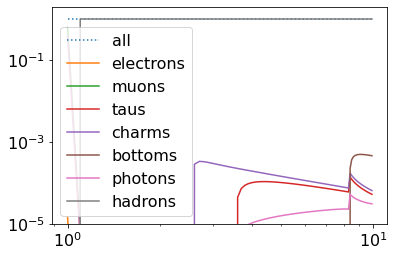

In [37]:
fig, ax = plt.subplots() 
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([10**-5,2])
ax.plot([maList[0],maList[-1]],[1,1],label='all',ls=':') 
ax.plot(maList,brs[0],label='electrons') 
ax.plot(maList,brs[1],label='muons') 
ax.plot(maList,brs[2],label='taus') 
ax.plot(maList,brs[3],label='charms') 
ax.plot(maList,brs[4],label='bottoms') 
ax.plot(maList,brs[5],label='photons') 
ax.plot(maList,brs[6],label='hadrons') 
ax.legend()